In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
def replace_color(img,
        old_color=(0, 0, 0), new_color=(255, 255, 255)):
    img[np.all(img == old_color, axis=-1)] = new_color

    return img

def plot_image(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

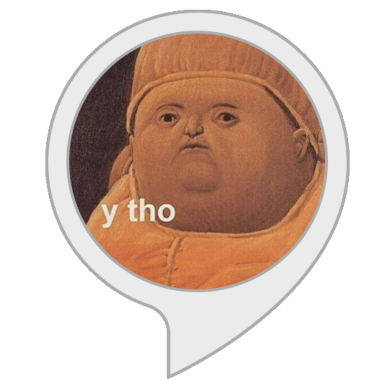

In [4]:
basic_image = cv.imread('sticker.png')
basic_image = replace_color(basic_image)

rows, cols = basic_image.shape[:2]

plot_image(basic_image)

### Линейные преобразования

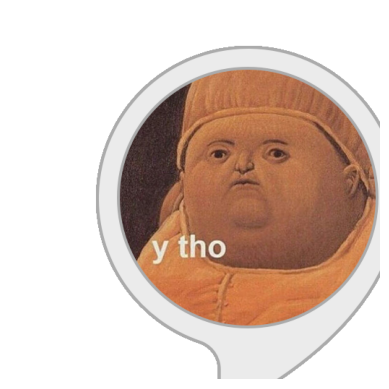

In [5]:
x_shift, y_shift = 70, 50
shift_transform = np.float32([
    [1, 0, x_shift],
    [0, 1, y_shift],
])

shift_image = cv.warpAffine(
    basic_image, shift_transform, (rows, cols))
shift_image = replace_color(shift_image)

plot_image(shift_image)

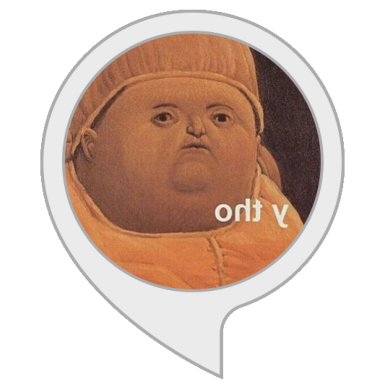

In [6]:
mirror_axis = 'x'
if mirror_axis == 'x':
    mirror_transform = np.float32([
        [-1,  0, cols - 1],
        [ 0,  1,    0]
    ])
elif mirror_axis == 'y':
    mirror_transform = np.float32([
        [1,  0,    0    ],
        [0, -1, rows - 1]
    ])

mirror_image = cv.warpAffine(
    basic_image, mirror_transform, (rows, cols))

plot_image(mirror_image)

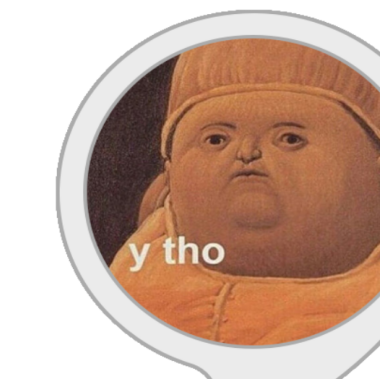

In [7]:
x_scale, y_scale = 1.3, 1.2
scale_transform = np.float32([
    [x_scale,   0,    0],
    [   0,   y_scale, 0]
])

scale_image = cv.warpAffine(
    basic_image, scale_transform, (rows, cols))

plot_image(scale_image)

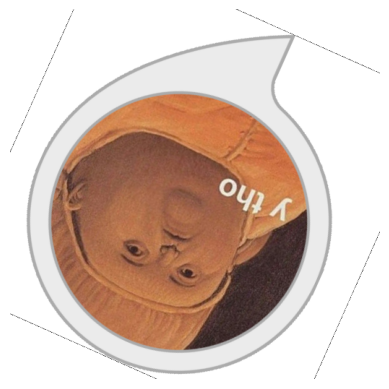

In [8]:
phi = 204

rotate_transform = cv.getRotationMatrix2D(
    ((cols - 1) // 2, (rows - 1) // 2), -phi, 1
)

rotate_image = cv.warpAffine(
    basic_image, rotate_transform, (rows, cols))
rotate_image = replace_color(rotate_image)

plot_image(rotate_image)

### Аффинные отображения

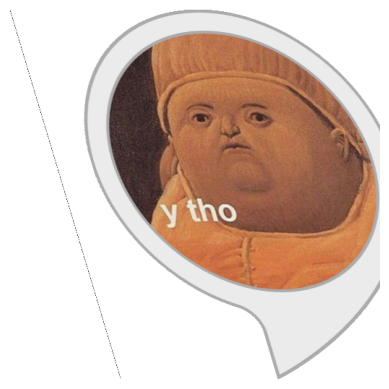

In [9]:
s = .3
tilt_tansform = np.float32([
    [1, s, 0],
    [0, 1, 0]
])

titl_image = cv.warpAffine(
    basic_image, tilt_tansform, (rows, cols))
titl_image = replace_color(titl_image)

plot_image(titl_image)


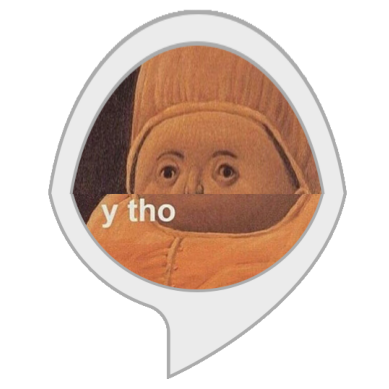

In [10]:
x_s, y_s = 1, 1.5
piecewise_transform = np.float32([
    [x_s, 0,  0],
    [ 0, y_s, 0]
])

piecewise_image = basic_image.copy()
piecewise_image[:(rows // 2), :, :] = cv.warpAffine(
    basic_image, piecewise_transform, (cols, rows - rows // 2))

plot_image(piecewise_image)

### Нелинейные преобразования

In [11]:
x_y_old = np.float32([
    [135, 385],
    [391, 393],
    [91,  74],
    [387, 82]
])
x_y_new = np.float32([
    [43,  385],
    [461, 393],
    [184, 74],
    [344, 82]
])

perspective_transform = cv.getPerspectiveTransform(x_y_old, x_y_new)

perspective_image = cv.warpPerspective(
    basic_image, perspective_transform, (rows, cols))
perspective_image = replace_color(perspective_image)

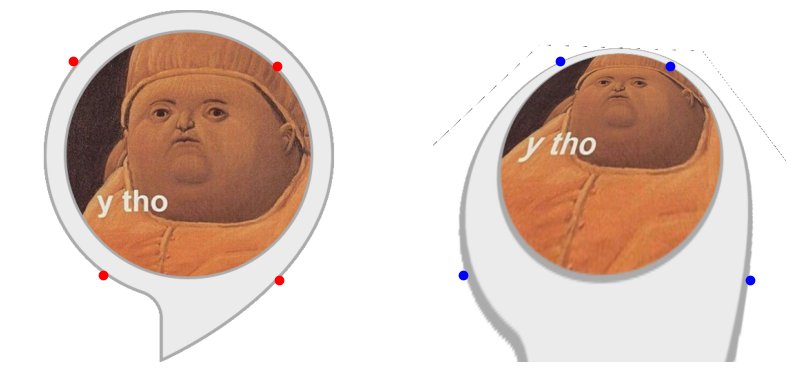

In [12]:
_, axis = plt.subplots(1, 2, figsize=(10, 10))

axis[0].scatter(x_y_old[:, 0], x_y_old[:, 1], color='red')
axis[0].imshow(cv.cvtColor(basic_image, cv.COLOR_BGR2RGB))
axis[0].axis('off')

axis[1].scatter(x_y_new[:, 0], x_y_new[:, 1], color='blue')
axis[1].imshow(cv.cvtColor(perspective_image, cv.COLOR_BGR2RGB))
axis[1].axis('off')

plt.show()

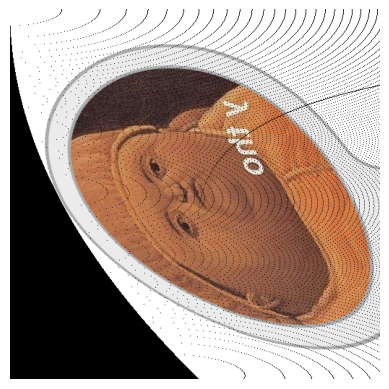

In [38]:
# For second order polynomial transform

T = np.float32([
    [  0,     0],
    [  1,     0],
    [  0,     1],
    [  0,   .00001],
    [.0001,   0],
    [.001,    0]
])
x, y = np.meshgrid(np.arange(cols), np.arange(rows))

x_poly = np.round(
    T[0, 0] + T[1, 0]*x + T[2, 0]*y + T[3, 0]*x*y + \
    T[4, 0]*(x**2) + T[5, 0]*(y**2)).astype(np.float32)
y_poly = np.round(
    T[0, 0] + T[1, 1]*x + T[2, 1]*y + T[3, 1]*x*y + \
    T[4, 1]*(x**2) + T[5, 1]*(y**2)).astype(np.float32)

mask = np.logical_and(
    np.logical_and(x_poly >= 0, x_poly < cols),
    np.logical_and(y_poly >= 0, y_poly < rows))

masked_x_poly = x_poly[mask].astype(int)
masked_y_poly = y_poly[mask].astype(int)
masked_basic_image = basic_image[x[mask], y[mask], :]

polynomial_image = np.zeros(basic_image.shape, basic_image.dtype)
polynomial_image[masked_y_poly, masked_x_poly, :] = masked_basic_image

plot_image(polynomial_image)

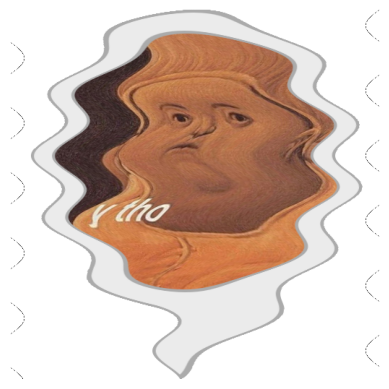

In [14]:
u, v = np.meshgrid(np.arange(cols), np.arange(rows))
u = u + 20 * np.sin(2 * np.pi * v / 90)

sinusoid_image = cv.remap(
    basic_image,
    u.astype(np.float32), v.astype(np.float32),
    cv.INTER_LINEAR
)
sinusoid_image = replace_color(sinusoid_image)

plot_image(sinusoid_image)